In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
import gdown

#downloadint the file from gdrive

file_id='1lwmokQo-3nw9SyrwxeljcAQlWvnEQ4OT'
file_name='Clustering_Data.csv'
url=f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, file_name,quiet=False)
clustering_set=pd.read_csv(file_name)
clustering_set = clustering_set.drop(['Customer_Segment'],axis=1) #removing labels
clustering_set

Downloading...
From: https://drive.google.com/uc?id=1lwmokQo-3nw9SyrwxeljcAQlWvnEQ4OT
To: /content/Clustering_Data.csv
100%|██████████| 11.5k/11.5k [00:00<00:00, 20.1MB/s]


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Z-score normalization (data is in similar scale)
clustering_set = (clustering_set - clustering_set.mean())/clustering_set.std()
clustering_set

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [4]:
# To calculate the squared Euclidean distance.
def square_distance(a,b):
    return np.sum((a-b)**2,axis=1)

# This function is used to assign each data point to its nearest centroid.
def get_clusters(clustering_data,centroids):
    distance = [square_distance(clustering_set, centroids.iloc[i]) for i in range(centroids.shape[0])] #dist of each data point from centroid
    distance = pd.concat(distance, axis = 1) #makes data points and centroids into 1 data frame
    clusters = pd.DataFrame(distance.idxmin(axis = 1) + 1,columns=['Cluster']) #finds closest cluster
    return clusters #initial clusters

# To find the new centroid with mean of each cluster
def new_centroids(clustering_set, clusters):
    k = clusters['Cluster'].max()  # Finds the number of clusters
    centroids = []
    for i in range(1, k + 1):  # Iterate through each cluster
        indexes = clusters[clusters['Cluster'] == i].index  # stores indices of true values for i
        centroid = clustering_set.iloc[indexes].mean()  # Compute mean for each cluster
        centroids.append(centroid)
    return pd.DataFrame(centroids)

In [5]:
def k_means_clustering(clustering_data, k, max_iterations=100, verbose=False): # verbose acts as a flag
    # it radnomly selects k centroids, random_state is so that centroids combination can be repeated,
    centroids = clustering_data.sample(n=k, random_state=42).reset_index(drop=True)

    for iteration in range(max_iterations):
        # Assign clusters
        clusters = get_clusters(clustering_data, centroids)

        # Compute new centroids
        new_centroid_positions = new_centroids(clustering_data, clusters)

        # This is done until convergence (centroids dont change) or the maximum number of iterations is reached.
        if centroids.equals(new_centroid_positions):
            if verbose:
                print(f"Convergence reached after {iteration + 1} iterations.")
            break     # Terminates the loop if the centroids no longer change between iterations.
        centroids = new_centroid_positions

        if verbose:
            print(f"Iteration {iteration + 1}: Centroids updated.")

    return clusters, centroids

In [6]:
def find_optimal_k(clustering_set, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        clusters, centroids = k_means_clustering(clustering_set, k)
        inertia = sum(np.min([square_distance(clustering_set, centroids.iloc[i]) for i in range(k)], axis=0)) #sum of dist of each data point to naerest centroid
        distortions.append(inertia) #list of intrtia/wcss points
    plt.plot(range(1, max_k + 1), distortions, marker='x')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()
#The Elbow method-plotting the wcss-( within-cluster sum of squares) against the number of clusters and finding elbow point


In [7]:
# Visualize clusters using Principal Component Analysis (PCA) in 2D.
def visualize_clusters(clustering_set, centroids, clusters):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(clustering_set)
    reduced_centroids = pca.transform(centroids)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters['Cluster'], cmap='viridis', s=50)
    plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='red', marker='x', s=200, label='Centroids') # Centroids are highlighted with a red "x"
    plt.title('Cluster Visualization with PCA')
    plt.legend()
    plt.show()

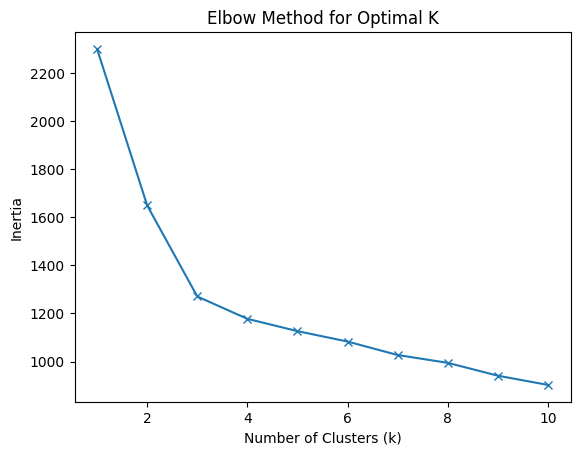

Final Centroids:
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0 -0.923467   -0.392933 -0.493126      0.170122  -0.490329      -0.075769   
1  0.832883   -0.302955  0.363680     -0.608475   0.575962       0.882747   
2  0.164444    0.869095  0.186373      0.522892  -0.075260      -0.976575   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.020754             -0.033439         0.058102        -0.899377   
1    0.975069             -0.560509         0.578654         0.170582   
2   -1.211829              0.724021        -0.777513         0.938890   

        Hue     OD280   Proline  
0  0.460505  0.270003 -0.751726  
1  0.472650  0.777055  1.122020  
2 -1.161512 -1.288776 -0.405943  


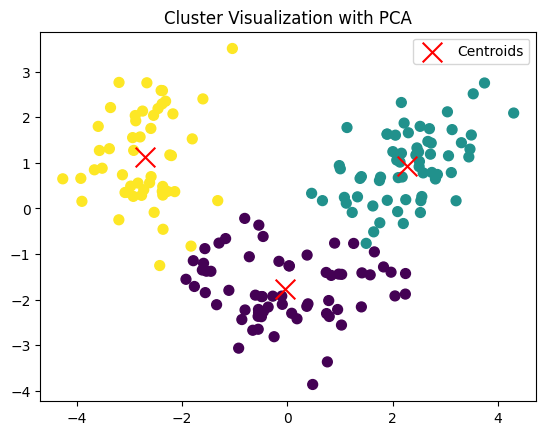

In [8]:
# To find the optimal number of clusters
find_optimal_k(clustering_set)

# Perform K-Means clustering for the chosen k=3 based on the elbow method
optimal_k = 3
clusters, centroids = k_means_clustering(clustering_set, optimal_k)

# Print the final centroids
print("Final Centroids:")
print(centroids)

# Visualize the clusters
visualize_clusters(clustering_set, centroids, clusters)


In [9]:
print("Final Centroids:")
centroids

Final Centroids:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.923467,-0.392933,-0.493126,0.170122,-0.490329,-0.075769,0.020754,-0.033439,0.058102,-0.899377,0.460505,0.270003,-0.751726
1,0.832883,-0.302955,0.363680,-0.608475,0.575962,0.882747,0.975069,-0.560509,0.578654,0.170582,0.472650,0.777055,1.122020
2,0.164444,0.869095,0.186373,0.522892,-0.075260,-0.976575,-1.211829,0.724021,-0.777513,0.938890,-1.161512,-1.288776,-0.405943
